In [1]:
import pandas as pd
import numpy as np

In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay , classification_report , accuracy_score

In [4]:
df = pd.read_csv('emails.csv')

In [5]:
df

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


In [6]:
df.shape

(5172, 3002)

In [7]:
x = df.drop(['Email No.','Prediction'],axis = 1)
y = df['Prediction']

In [8]:
x.dtypes

the               int64
to                int64
ect               int64
and               int64
for               int64
                  ...  
infrastructure    int64
military          int64
allowing          int64
ff                int64
dry               int64
Length: 3000, dtype: object

In [9]:
set(x.dtypes)

{dtype('int64')}

In [10]:
y.value_counts()

Prediction
0    3672
1    1500
Name: count, dtype: int64

In [11]:
scaler  = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [12]:
x_scaled

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03809524, 0.09848485, 0.06705539, ..., 0.        , 0.00877193,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00952381, 0.0530303 , 0.        , ..., 0.        , 0.00877193,
        0.        ],
       [0.1047619 , 0.18181818, 0.01166181, ..., 0.        , 0.        ,
        0.        ]])

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state=42)

In [14]:
x_scaled.shape

(5172, 3000)

In [15]:
print(x_train.shape)
print(x_test.shape)

(3879, 3000)
(1293, 3000)


In [16]:
knn = KNeighborsClassifier(n_neighbors=5)
model = knn.fit(x_train,y_train)

In [17]:
y_pred = knn.predict(x_test)

In [18]:
result = pd.DataFrame()
result['Actual'], result['Predicted'] = y_test,y_pred
result.sample(5)

,Actual,Predicted
4217,0,0
157,0,0
4362,1,1
3513,0,0
3469,0,1


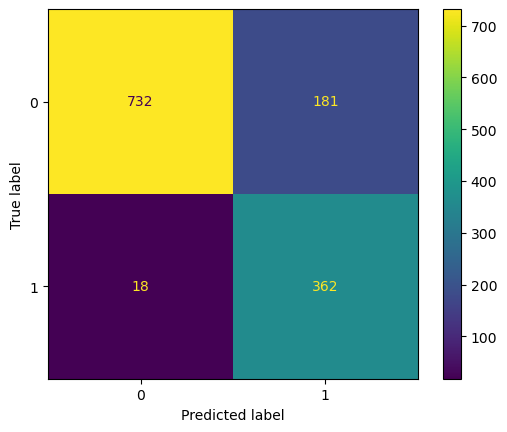

In [19]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [20]:
y_test.value_counts()

Prediction
0    913
1    380
Name: count, dtype: int64

In [21]:
accuracy_score(y_test,y_pred)

0.8460943542150039

In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.80      0.88       913
           1       0.67      0.95      0.78       380

    accuracy                           0.85      1293
   macro avg       0.82      0.88      0.83      1293
weighted avg       0.89      0.85      0.85      1293



In [24]:
from sklearn.svm import SVC
svm  = SVC(kernel='linear')
model = svm.fit(x_train,y_train)

In [25]:
y_pred = svm.predict(x_test)

In [26]:
result = pd.DataFrame()
result['Actual'], result['Predicted'] = y_test,y_pred
result.sample(5)

,Actual,Predicted
1034,0,0
2594,0,1
3845,0,0
3662,0,0
387,0,1


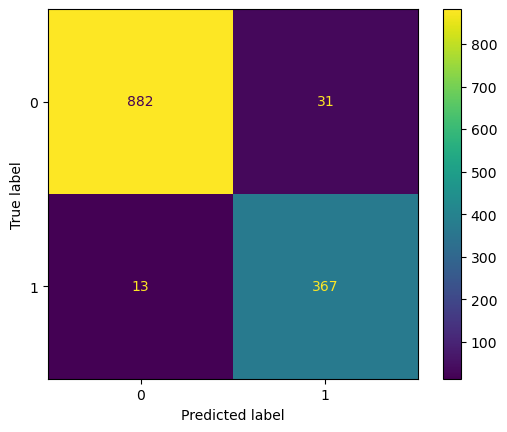

In [27]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [28]:
y_test.value_counts()

Prediction
0    913
1    380
Name: count, dtype: int64

In [29]:
accuracy_score(y_test,y_pred)

0.9659706109822119

In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       913
           1       0.92      0.97      0.94       380

    accuracy                           0.97      1293
   macro avg       0.95      0.97      0.96      1293
weighted avg       0.97      0.97      0.97      1293

